In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('monthyearcounts.csv')

In [3]:
df

Unnamed: 0  Year  Month  value
0             0  1965      1     13
1             1  1965      2     54
2             2  1965      3     38
3             3  1965      4     33
4             4  1965      5     22
..          ...   ...    ...    ...
619         619  2016      8     35
620         620  2016      9     46
621         621  2016     10     36
622         622  2016     11     44
623         623  2016     12     53

[624 rows x 4 columns]

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df

Year  Month  value
0    1965      1     13
1    1965      2     54
2    1965      3     38
3    1965      4     33
4    1965      5     22
..    ...    ...    ...
619  2016      8     35
620  2016      9     46
621  2016     10     36
622  2016     11     44
623  2016     12     53

[624 rows x 3 columns]

In [6]:
from datetime import datetime

In [7]:
df['MonthYear'] = None

In [8]:
for i in range(len(df['MonthYear'])):
    df.loc[i, 'MonthYear'] = datetime.strptime(str(df['Year'][i]) + '-' + str(df['Month'][i]), '%Y-%m')

In [9]:
df

Year  Month  value            MonthYear
0    1965      1     13  1965-01-01 00:00:00
1    1965      2     54  1965-02-01 00:00:00
2    1965      3     38  1965-03-01 00:00:00
3    1965      4     33  1965-04-01 00:00:00
4    1965      5     22  1965-05-01 00:00:00
..    ...    ...    ...                  ...
619  2016      8     35  2016-08-01 00:00:00
620  2016      9     46  2016-09-01 00:00:00
621  2016     10     36  2016-10-01 00:00:00
622  2016     11     44  2016-11-01 00:00:00
623  2016     12     53  2016-12-01 00:00:00

[624 rows x 4 columns]

In [10]:
df_train = df[df['Year'] != 2016]
df_test = df[df['Year'] == 2016]

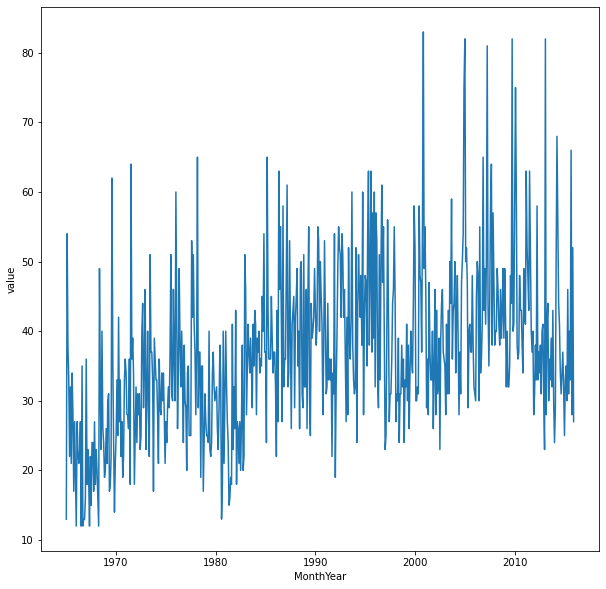

In [11]:
plt.figure(figsize = (10,10))
sns.lineplot(x = 'MonthYear', y = 'value', data = df_train)
plt.show()

Some increasing trends are appearing (as we know, earthquakes seem to be increasing) - so some differences need to be taken, looks either linear or quadratic - can't tell yet - we'll try both!

C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


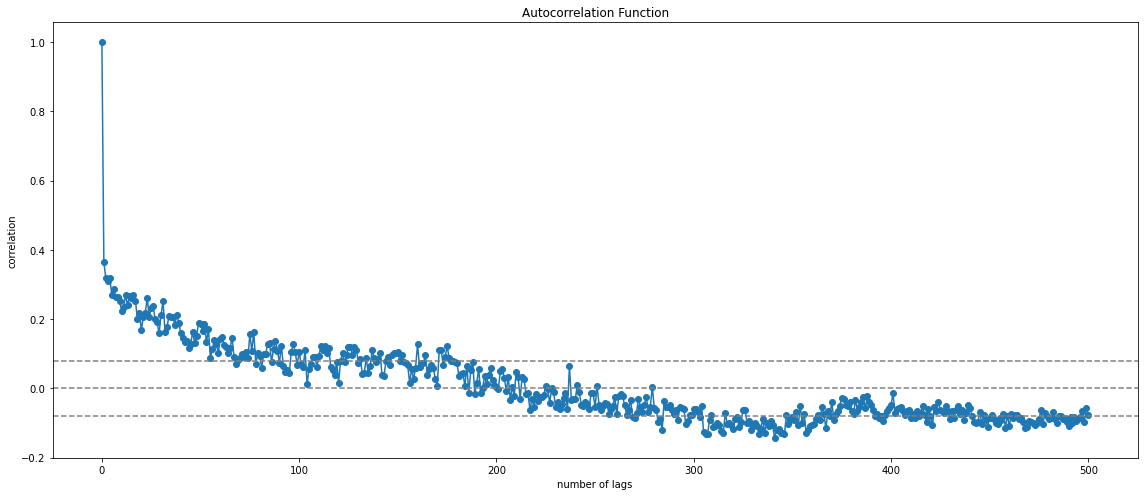

In [12]:
lag_acf = acf(df_train['value'], nlags=500)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

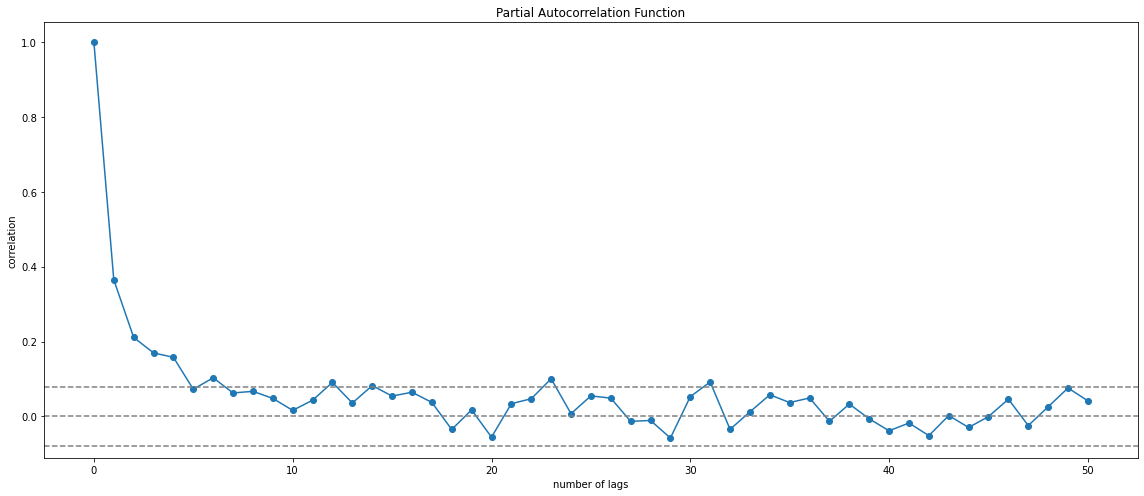

In [13]:
lag_pacf = pacf(df_train['value'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

its clear some differencing needs to be taken, with non-stationarity appearing in the time series plot and the ACF plot

Taking the first difference:

<ipython-input-14-07eceab5174b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['first_diff'] = df_train['value'].diff()


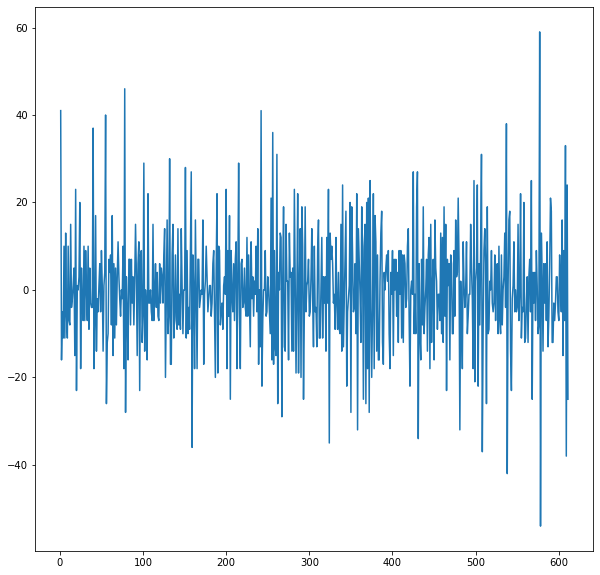

In [14]:
df_train['first_diff'] = df_train['value'].diff()
plt.figure(figsize = (10,10))
plt.plot(df_train['first_diff'])
plt.show()

<ipython-input-15-e557f0c09b72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['second_diff'] = df_train['value'].diff().diff()


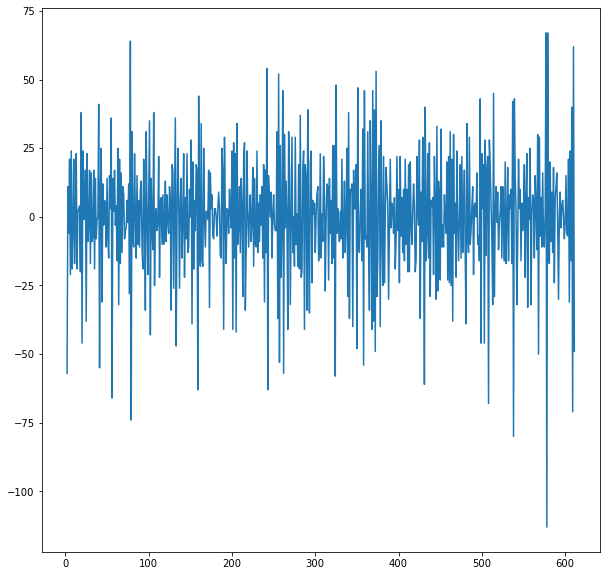

In [15]:
df_train['second_diff'] = df_train['value'].diff().diff()
plt.figure(figsize = (10,10))
plt.plot(df_train['second_diff'])
plt.show()

First different (at lag 1) looks a bit more suited!

Looking at ACF:

In [16]:
#Should I do this???????????
df_train.fillna(0, inplace = True)

C:\Users\Taz\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


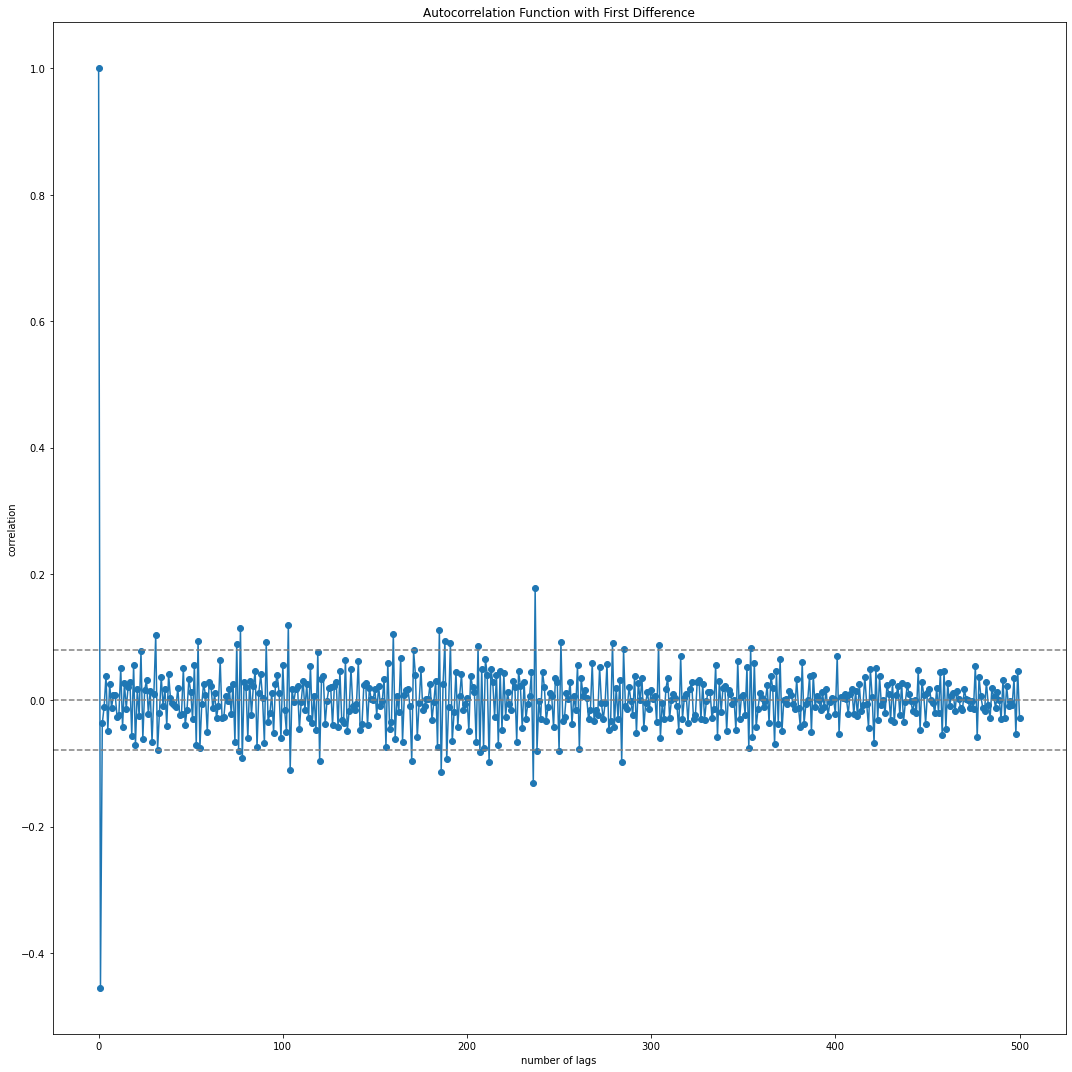

In [17]:
lag_acf = acf(df_train['first_diff'], nlags=500)
plt.figure(figsize=(15, 15))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function with First Difference')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

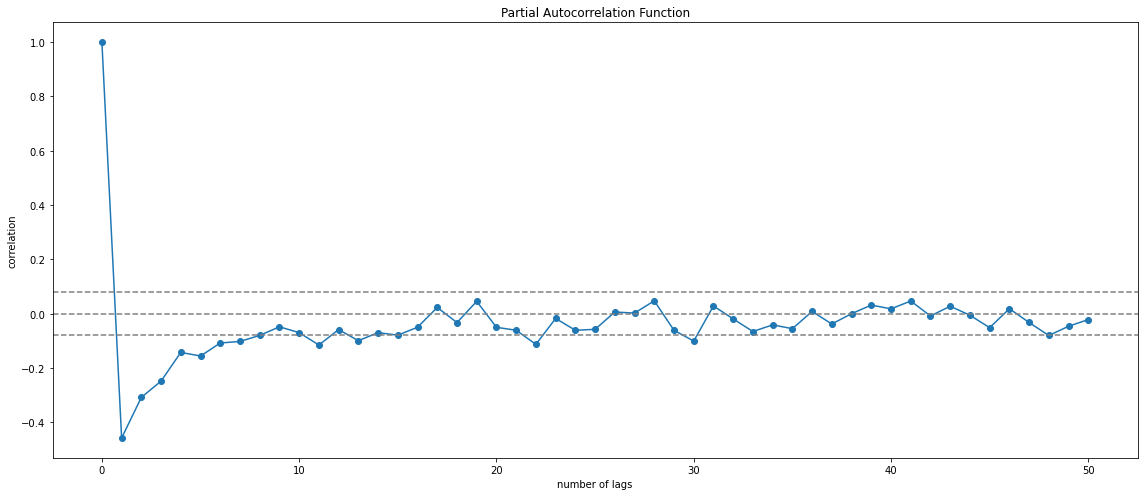

In [18]:
lag_pacf = pacf(df_train['first_diff'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

The two spikes in the ACF combined with exponential decay in the PACF is a strong suggest of an MA(2) Model!

Let's fit this:

In [19]:
model = ARIMA(df_train['value'], order=(0,1,2))

In [20]:
model_fit = model.fit()

In [21]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  612
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -2296.947
Date:                Thu, 30 Dec 2021   AIC                           4599.893
Time:                        23:14:04   BIC                           4613.139
Sample:                             0   HQIC                          4605.045
                                - 612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8286      0.037    -22.425      0.000      -0.901      -0.756
ma.L2         -0.0948      0.037     -2.547      0.011      -0.168      -0.022
sigma2       107.5289      4.466     24.078      0.0

all features significant, failure of both tests, residuals skewed with kurtosis not equal to 3

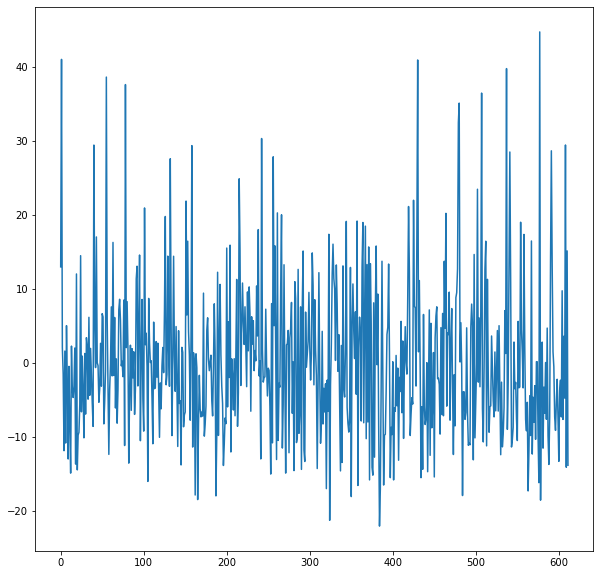

In [22]:
plt.figure(figsize = (10,10))
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.show()

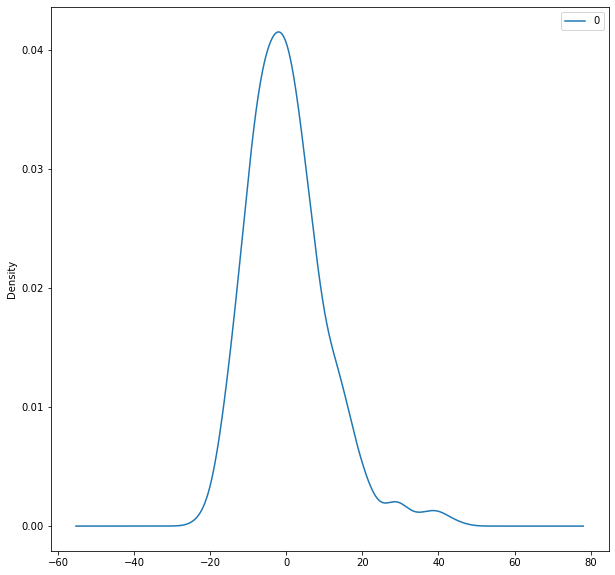

In [23]:
residuals.plot(kind='kde', figsize = (10,10))
plt.show()

C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


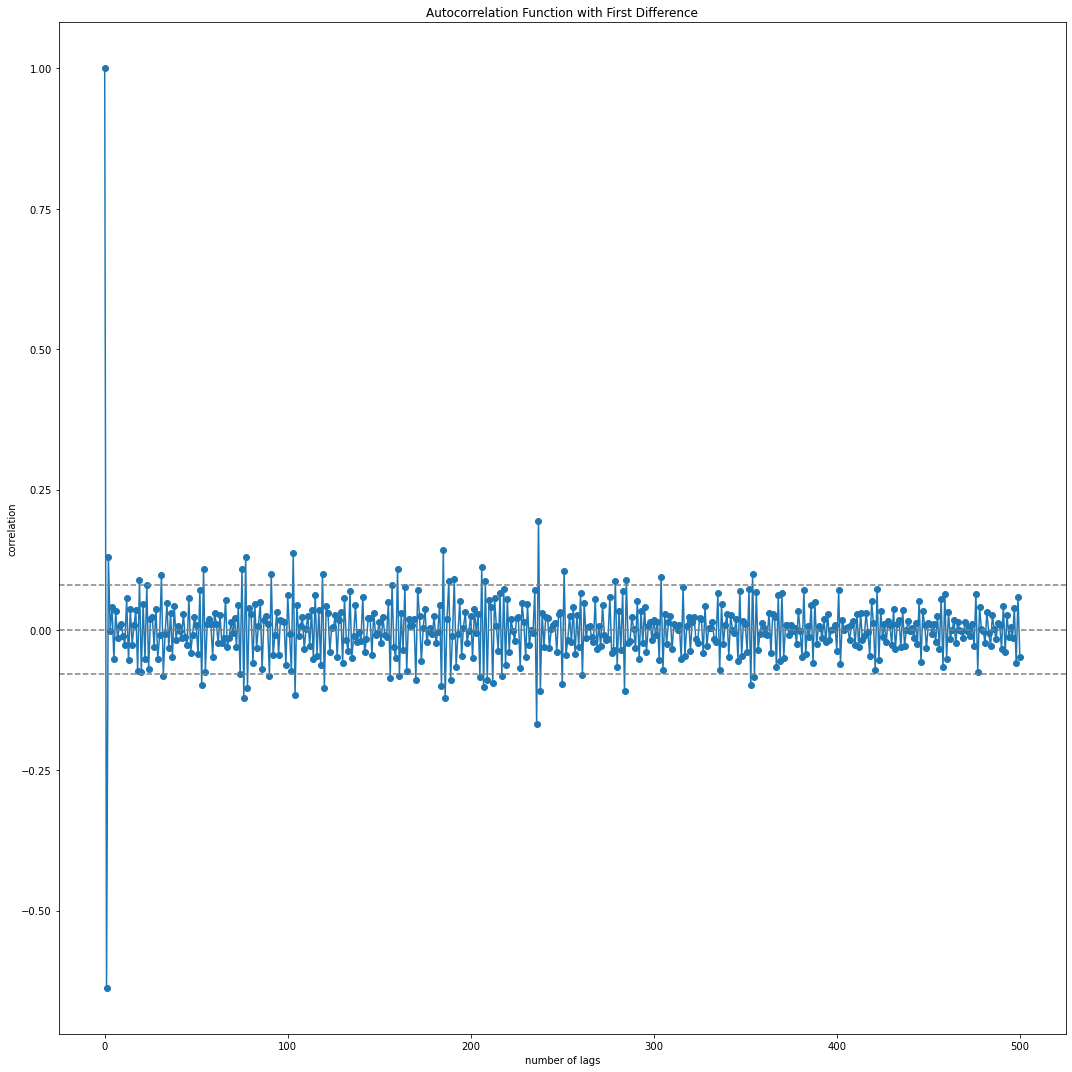

In [24]:
lag_acf = acf(df_train['second_diff'], nlags=500)
plt.figure(figsize=(15, 15))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function with First Difference')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

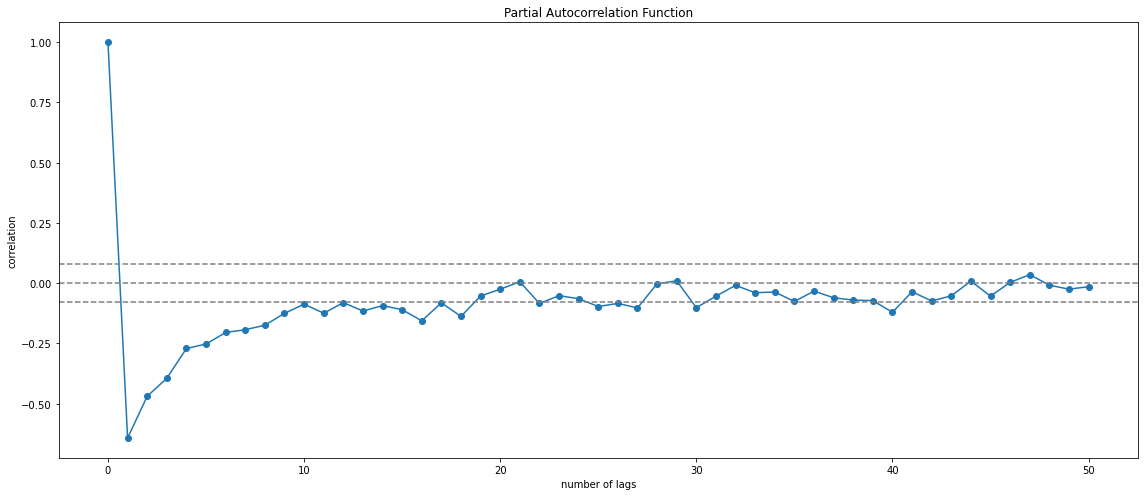

In [25]:
lag_pacf = pacf(df_train['second_diff'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

MA(3) Model

In [26]:
model1 = ARIMA(df_train['value'], order=(0,2,3))

In [27]:
model_fit1 = model1.fit()

C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [28]:
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  612
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -2299.225
Date:                Thu, 30 Dec 2021   AIC                           4606.450
Time:                        23:14:05   BIC                           4624.104
Sample:                             0   HQIC                          4613.317
                                - 612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8274      0.093    -19.751      0.000      -2.009      -1.646
ma.L2          0.7347      0.109      6.734      0.000       0.521       0.948
ma.L3          0.0928      0.038      2.460      0.0

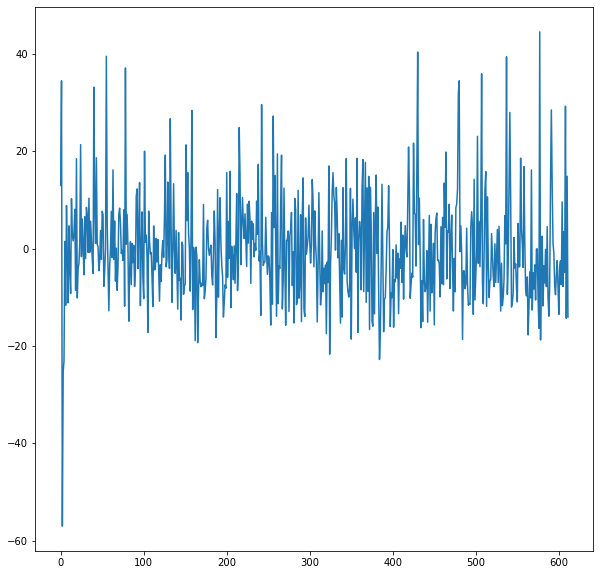

In [29]:
plt.figure(figsize = (10,10))
residuals1 = pd.DataFrame(model_fit1.resid)
plt.plot(residuals1)
plt.show()

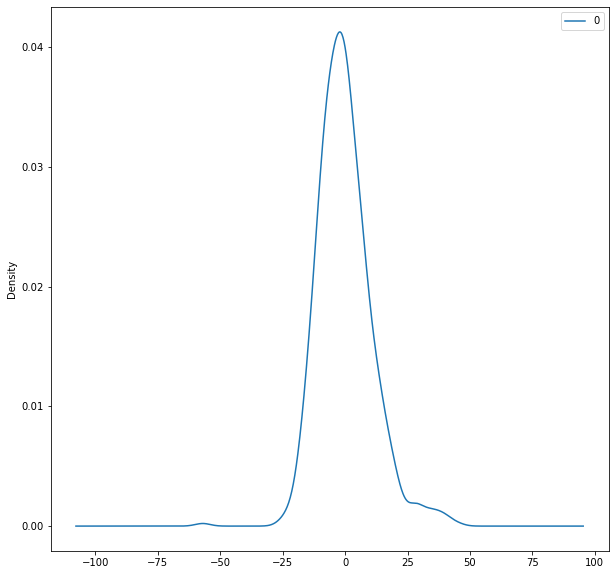

In [30]:
residuals1.plot(kind='kde', figsize = (10,10))
plt.show()

Second difference has better residuals, seems to have passed the ljung box test but not the Jarque-Bera one. Heavier tails and skew compared to a normal dist. - not completely gaussian residuals. Second different model is taken.

In [31]:
# Predictions
yhat = model_fit1.predict(len(df_train), len(df_train)+11)
print(yhat)

612    37.244174
613    38.566045
614    38.586838
615    38.607632
616    38.628426
617    38.649220
618    38.670013
619    38.690807
620    38.711601
621    38.732395
622    38.753188
623    38.773982
Name: predicted_mean, dtype: float64


In [32]:
pred_my = df[df['Year'] == 2016]['MonthYear'].reset_index().drop('index', axis = 1)

In [33]:
predictions = pd.Series(yhat).reset_index()

In [34]:
predictions.drop('index', axis = 1, inplace = True)

In [35]:
predictions

predicted_mean
0        37.244174
1        38.566045
2        38.586838
3        38.607632
4        38.628426
5        38.649220
6        38.670013
7        38.690807
8        38.711601
9        38.732395
10       38.753188
11       38.773982

In [36]:
combined_pred = pd.concat([pred_my, predictions], axis = 1)

In [37]:
overall_extract_2012 = df[564:613]

In [38]:
true_2016 = df[df['Year'] == 2016]

In [39]:
forecasts = model_fit1.get_forecast(12)

In [40]:
ci_s = forecasts.conf_int(alpha=0.05)

In [41]:
ci_s = ci_s.reset_index().drop('index', axis = 1)

In [42]:
combined_pred = pd.concat([combined_pred, ci_s], axis = 1)

In [43]:
combined_pred

MonthYear  predicted_mean  lower value  upper value
0   2016-01-01 00:00:00       37.244174    16.883712    57.604636
1   2016-02-01 00:00:00       38.566045    17.900066    59.232024
2   2016-03-01 00:00:00       38.586838    17.854577    59.319100
3   2016-04-01 00:00:00       38.607632    17.809080    59.406184
4   2016-05-01 00:00:00       38.628426    17.763574    59.493277
5   2016-06-01 00:00:00       38.649220    17.718061    59.580379
6   2016-07-01 00:00:00       38.670013    17.672538    59.667488
7   2016-08-01 00:00:00       38.690807    17.627008    59.754606
8   2016-09-01 00:00:00       38.711601    17.581469    59.841733
9   2016-10-01 00:00:00       38.732395    17.535922    59.928867
10  2016-11-01 00:00:00       38.753188    17.490367    60.016009
11  2016-12-01 00:00:00       38.773982    17.444804    60.103160

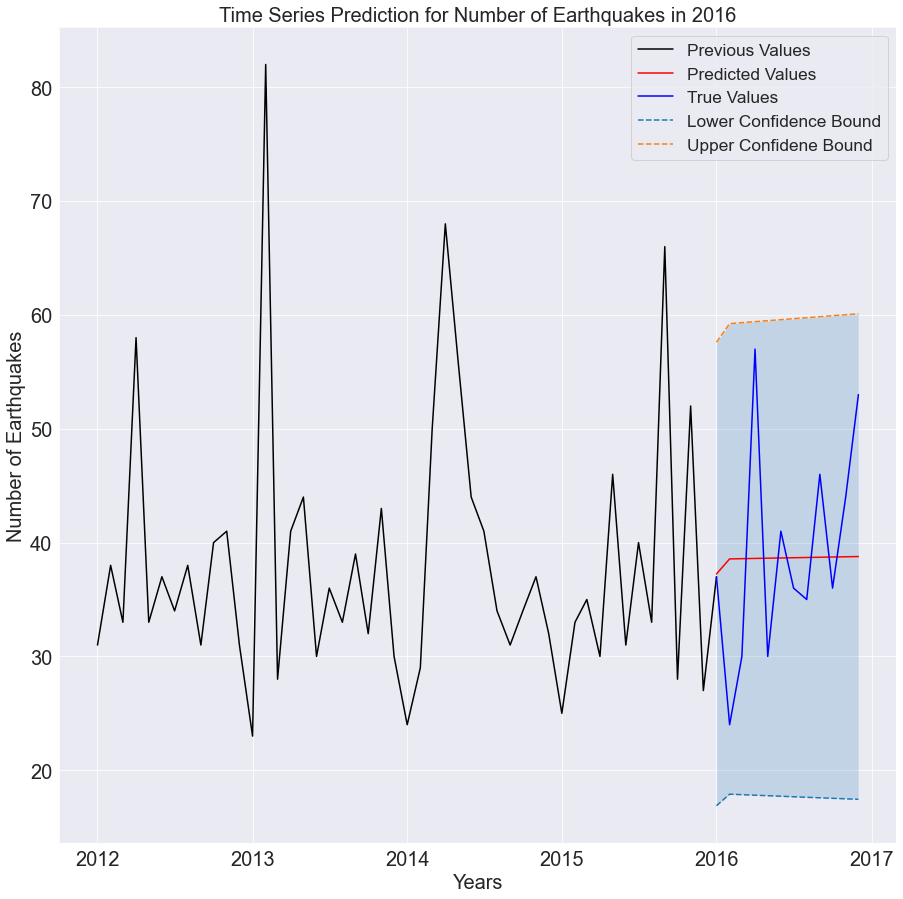

In [44]:
sns.set_style('darkgrid')

#Creating Figure
fig, ax = plt.subplots(figsize = (15,15))

#Lines
sns.lineplot(x = 'MonthYear', y = 'value', data = overall_extract_2012, color = 'k', ax=ax)
sns.lineplot(x = 'MonthYear', y = 'predicted_mean', data = combined_pred, color = 'r', ax=ax)
sns.lineplot(x = 'MonthYear', y = 'value', data = true_2016, color = 'b', ax=ax)

# Confidence Bounds
ax.plot(combined_pred['MonthYear'], combined_pred['lower value'], '--')
ax.plot(combined_pred['MonthYear'], combined_pred['upper value'], '--')
ax.fill_between(combined_pred['MonthYear'], combined_pred['lower value'], 
               combined_pred['upper value'], alpha = 0.2)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    
ax.set_title('Time Series Prediction for Number of Earthquakes in 2016', fontsize = 20)

#Plot Features
plt.legend(['Previous Values', 'Predicted Values', 'True Values', 'Lower Confidence Bound',
           'Upper Confidene Bound'], fontsize = 'xx-large')
#plt.title('Time Series Prediction for Number of Earthquakes in 2016')
plt.xlabel('Years')
plt.ylabel('Number of Earthquakes')

plt.show()